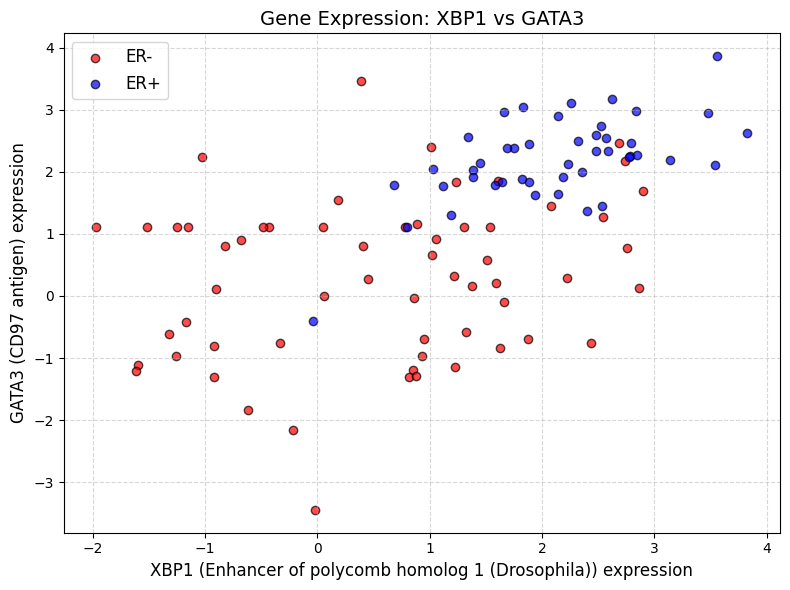

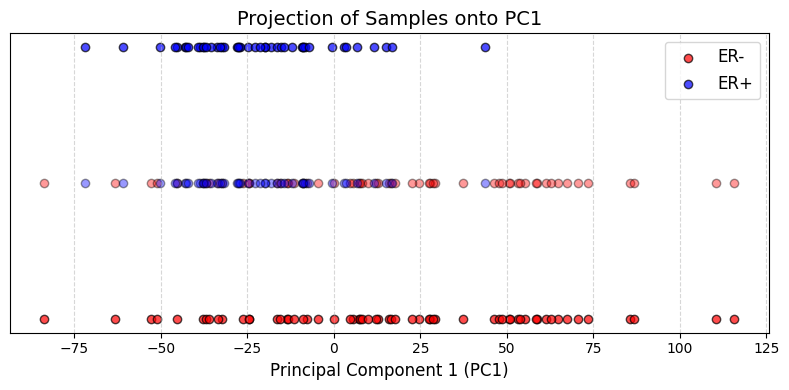

Explained variance ratio:
PC1: 0.102
PC2: 0.074

Top loadings on PC1:
23156    0.021839
22813    0.021147
4251     0.020995
9686     0.020835
21085    0.020745
11396    0.020583
10502    0.020519
25374    0.020272
24202    0.020234
24835    0.020087
dtype: float64


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# 1. Load class labels (ER+ = 1, ER- = 0)
classes = pd.read_csv('data/class.tsv', sep='\t', header=None, names=['class'])
# print(classes)
y = classes['class'].values

# 2. Load gene expression data (genes as rows, samples as columns)
expr_data = pd.read_csv('data/filtered.tsv', sep='\t', index_col=0)

# 3. Load gene name mappings
gene_data = pd.read_csv('data/columns.tsv', sep='\t')

xid = gene_data.loc[gene_data['GeneSymbol'] == 'XBP1', 'ID'].values[0]
xid = str(xid)
gid = gene_data.loc[gene_data['GeneSymbol'] == 'GATA3', 'ID'].values[0]
gid = str(gid)

expr_data.columns = expr_data.columns.str.strip()


# Get expression values for XBP1 (4404) and GATA3 (2625)
xbp1_expr = expr_data[xid].values
gata3_expr = expr_data[gid].values



# Create Figure 1a: Scatter plot of XBP1 vs GATA3
plt.figure(figsize=(8, 6))
plt.scatter(xbp1_expr[y == 0], gata3_expr[y == 0], 
            c='red', label='ER-', alpha=0.7, edgecolor='k')
plt.scatter(xbp1_expr[y == 1], gata3_expr[y == 1], 
            c='blue', label='ER+', alpha=0.7, edgecolor='k')
plt.xlabel(f'XBP1 ({gene_data.loc[4404, "GeneName"]}) expression', fontsize=12)
plt.ylabel(f'GATA3 ({gene_data.loc[2625, "GeneName"]}) expression', fontsize=12)
plt.title('Gene Expression: XBP1 vs GATA3', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Prepare data for PCA
X = expr_data.values  

# Standardize the data 
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Figure 1c: Projection onto PC1
plt.figure(figsize=(8 ,4))
plt.scatter(X_pca[y == 0, 0], np.zeros(sum(y == 0)) - 0.1, 
            c='red', label='ER-', alpha=0.7, edgecolor='k')
plt.scatter(X_pca[y == 1, 0], np.zeros(sum(y == 1)) + 0.1, 
            c='blue', label='ER+', alpha=0.7, edgecolor='k')

# Combined view at center line
plt.scatter(X_pca[y == 0, 0], np.zeros(sum(y == 0)), 
            c='red', alpha=0.4, edgecolor='k')
plt.scatter(X_pca[y == 1, 0], np.zeros(sum(y == 1)), 
            c='blue', alpha=0.4, edgecolor='k')

plt.xlabel('Principal Component 1 (PC1)', fontsize=12)
plt.ylabel('')
plt.yticks([])
plt.title('Projection of Samples onto PC1', fontsize=14)
plt.legend(fontsize=12, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Print PCA information
print(f"Explained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f}")
print(f"\nTop loadings on PC1:")
pc1_loadings = pd.Series(pca.components_[0], index=expr_data.columns)
print(pc1_loadings.abs().sort_values(ascending=False).head(10))